In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
haxby_db = niidb.FMriActivationsDb('data/haxby_mc_zrest_cv_11.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in haxby_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz', num_factors=100, embedding_dim=2)

10/05/2020 19:22:16 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 19:22:17 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 19:22:18 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 19:22:19 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run04_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Final/mask/haxby_mask.nii.gz (zscore=True, smooth=6, zscore_by_rest=True)
10/05/2020 19:22:19 Loading Nifti image /home/eli/Documents/Haxby_Final/sub1_run05_mc_MNI_masked.nii.gz with mask /home/eli/Documents/Haxby_Fina

In [7]:
dtfa.num_voxels

32233

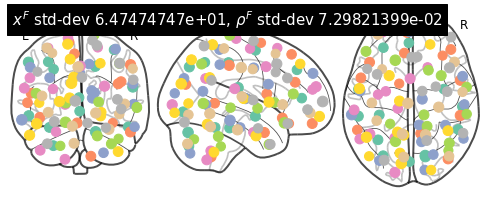

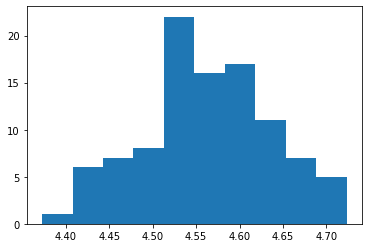

(<nilearn.plotting.displays.OrthoProjector at 0x7f9aa8cc6710>,
 tensor([[-32.3582, -31.9868, -23.0143],
         [ 35.6276,  -4.6807,  58.7168],
         [ 50.5782, -47.1690, -22.4743],
         [-33.5813, -58.0411,  46.0166],
         [-27.9750,  38.8913,  38.1881],
         [ -1.1748,  43.9491,   8.4172],
         [ -0.5645, -80.9584,  -5.9181],
         [ 15.9403, -74.3615,  41.2667],
         [-54.4514, -33.1494,  45.6294],
         [ 55.4006, -23.0091,  19.5075],
         [-54.0862,  -4.8815, -10.6174],
         [ 16.2019, -75.6942, -27.5931],
         [-28.2432, -74.8286, -42.2100],
         [ 34.2996,  30.5458, -18.3243],
         [-11.3339,   1.0653,  66.6067],
         [ -5.9708,  33.2260,  54.4699],
         [ 40.0552, -78.1645,  22.9008],
         [ 42.9968,  36.9557,  25.1102],
         [ 11.2266, -51.3894, -53.3210],
         [-55.4284, -47.6724,   3.0197],
         [ 52.8820,   4.5573, -27.7438],
         [-42.4912,  23.4911, -12.4362],
         [ 52.9516, -32.4320,  42.9

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

472

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 19:23:23 [Epoch 1] (6242ms) Posterior free-energy 8.28138240e+09 = KL from prior 1.37887760e+07 - log-likelihood -8.26759373e+09
10/05/2020 19:23:23 Saving checkpoint...
10/05/2020 19:23:29 [Epoch 2] (6161ms) Posterior free-energy 8.06895514e+09 = KL from prior 8.56198400e+06 - log-likelihood -8.06039347e+09
10/05/2020 19:23:35 [Epoch 3] (6073ms) Posterior free-energy 7.92150426e+09 = KL from prior 6.73712750e+06 - log-likelihood -7.91476890e+09
10/05/2020 19:23:41 [Epoch 4] (6048ms) Posterior free-energy 7.81432166e+09 = KL from prior 4.82182150e+06 - log-likelihood -7.80950118e+09
10/05/2020 19:23:47 [Epoch 5] (6086ms) Posterior free-energy 7.74277274e+09 = KL from prior 3.27092450e+06 - log-likelihood -7.73950106e+09
10/05/2020 19:23:53 [Epoch 6] (6063ms) Posterior free-energy 7.68191386e+09 = KL from prior 2.05068362e+06 - log-likelihood -7.67986381e+09
10/05/2020 19:23:59 [Epoch 7] (6032ms) Posterior free-energy 7.63456410e+09 = KL from prior 1.29553562e+06 - log-likeli

Epoch   496: reducing learning rate of group 0 to 5.0000e-03.
Epoch   496: reducing learning rate of group 1 to 5.0000e-04.
Epoch   496: reducing learning rate of group 2 to 5.0000e-03.
Epoch   496: reducing learning rate of group 3 to 5.0000e-04.


10/05/2020 20:13:27 [Epoch 497] (6087ms) Posterior free-energy 5.31302093e+09 = KL from prior 1.73844700e+06 - log-likelihood -5.31128371e+09
10/05/2020 20:13:33 [Epoch 498] (6143ms) Posterior free-energy 5.27905536e+09 = KL from prior 1.71983788e+06 - log-likelihood -5.27733504e+09
10/05/2020 20:13:39 [Epoch 499] (6178ms) Posterior free-energy 5.27769805e+09 = KL from prior 1.71887512e+06 - log-likelihood -5.27597875e+09
10/05/2020 20:13:45 [Epoch 500] (6105ms) Posterior free-energy 5.27709030e+09 = KL from prior 1.71280750e+06 - log-likelihood -5.27537715e+09
10/05/2020 20:13:51 [Epoch 501] (6053ms) Posterior free-energy 5.27670835e+09 = KL from prior 1.71324462e+06 - log-likelihood -5.27499520e+09
10/05/2020 20:13:51 Saving checkpoint...
10/05/2020 20:13:57 [Epoch 502] (6077ms) Posterior free-energy 5.27624346e+09 = KL from prior 1.71340488e+06 - log-likelihood -5.27452877e+09
10/05/2020 20:14:03 [Epoch 503] (6066ms) Posterior free-energy 5.27589786e+09 = KL from prior 1.71527438e+0

Epoch   726: reducing learning rate of group 0 to 2.5000e-03.
Epoch   726: reducing learning rate of group 1 to 2.5000e-04.
Epoch   726: reducing learning rate of group 2 to 2.5000e-03.
Epoch   726: reducing learning rate of group 3 to 2.5000e-04.


10/05/2020 20:36:48 [Epoch 727] (6029ms) Posterior free-energy 5.25856205e+09 = KL from prior 1.75045775e+06 - log-likelihood -5.25681152e+09
10/05/2020 20:36:54 [Epoch 728] (6075ms) Posterior free-energy 5.25544346e+09 = KL from prior 1.75076825e+06 - log-likelihood -5.25369139e+09
10/05/2020 20:37:00 [Epoch 729] (6077ms) Posterior free-energy 5.25529856e+09 = KL from prior 1.75050200e+06 - log-likelihood -5.25354854e+09
10/05/2020 20:37:06 [Epoch 730] (6065ms) Posterior free-energy 5.25505741e+09 = KL from prior 1.74676812e+06 - log-likelihood -5.25330995e+09
10/05/2020 20:37:12 [Epoch 731] (6060ms) Posterior free-energy 5.25500467e+09 = KL from prior 1.74717575e+06 - log-likelihood -5.25325824e+09
10/05/2020 20:37:18 [Epoch 732] (6064ms) Posterior free-energy 5.25482189e+09 = KL from prior 1.74763975e+06 - log-likelihood -5.25307443e+09
10/05/2020 20:37:24 [Epoch 733] (6066ms) Posterior free-energy 5.25477376e+09 = KL from prior 1.74739125e+06 - log-likelihood -5.25302630e+09
10/05/

Epoch   769: reducing learning rate of group 0 to 1.2500e-03.
Epoch   769: reducing learning rate of group 1 to 1.2500e-04.
Epoch   769: reducing learning rate of group 2 to 1.2500e-03.
Epoch   769: reducing learning rate of group 3 to 1.2500e-04.


10/05/2020 20:41:09 [Epoch 770] (6071ms) Posterior free-energy 5.25354752e+09 = KL from prior 1.74717650e+06 - log-likelihood -5.25180109e+09
10/05/2020 20:41:15 [Epoch 771] (6055ms) Posterior free-energy 5.25349939e+09 = KL from prior 1.74416475e+06 - log-likelihood -5.25175654e+09
10/05/2020 20:41:21 [Epoch 772] (6082ms) Posterior free-energy 5.25341952e+09 = KL from prior 1.74898025e+06 - log-likelihood -5.25167104e+09
10/05/2020 20:41:28 [Epoch 773] (6065ms) Posterior free-energy 5.25349734e+09 = KL from prior 1.74482388e+06 - log-likelihood -5.25175296e+09
10/05/2020 20:41:34 [Epoch 774] (6075ms) Posterior free-energy 5.25334016e+09 = KL from prior 1.74767588e+06 - log-likelihood -5.25159373e+09
10/05/2020 20:41:40 [Epoch 775] (6073ms) Posterior free-energy 5.25340621e+09 = KL from prior 1.74860512e+06 - log-likelihood -5.25165670e+09
10/05/2020 20:41:46 [Epoch 776] (6088ms) Posterior free-energy 5.25329971e+09 = KL from prior 1.74771525e+06 - log-likelihood -5.25155277e+09
10/05/

Epoch   811: reducing learning rate of group 0 to 6.2500e-04.
Epoch   811: reducing learning rate of group 1 to 6.2500e-05.
Epoch   811: reducing learning rate of group 2 to 6.2500e-04.
Epoch   811: reducing learning rate of group 3 to 6.2500e-05.


10/05/2020 20:45:25 [Epoch 812] (6080ms) Posterior free-energy 5.25270170e+09 = KL from prior 1.74626338e+06 - log-likelihood -5.25095629e+09
10/05/2020 20:45:31 [Epoch 813] (6070ms) Posterior free-energy 5.25263206e+09 = KL from prior 1.75019825e+06 - log-likelihood -5.25088358e+09
10/05/2020 20:45:37 [Epoch 814] (6090ms) Posterior free-energy 5.25264333e+09 = KL from prior 1.74630475e+06 - log-likelihood -5.25089638e+09
10/05/2020 20:45:43 [Epoch 815] (6048ms) Posterior free-energy 5.25262643e+09 = KL from prior 1.75026762e+06 - log-likelihood -5.25087642e+09
10/05/2020 20:45:49 [Epoch 816] (6050ms) Posterior free-energy 5.25259264e+09 = KL from prior 1.74716100e+06 - log-likelihood -5.25084518e+09
10/05/2020 20:45:55 [Epoch 817] (6038ms) Posterior free-energy 5.25259725e+09 = KL from prior 1.74868562e+06 - log-likelihood -5.25084979e+09
10/05/2020 20:46:01 [Epoch 818] (6091ms) Posterior free-energy 5.25255629e+09 = KL from prior 1.74850625e+06 - log-likelihood -5.25080730e+09
10/05/

Epoch   845: reducing learning rate of group 0 to 3.1250e-04.
Epoch   845: reducing learning rate of group 1 to 3.1250e-05.
Epoch   845: reducing learning rate of group 2 to 3.1250e-04.
Epoch   845: reducing learning rate of group 3 to 3.1250e-05.


10/05/2020 20:48:51 [Epoch 846] (6072ms) Posterior free-energy 5.25232435e+09 = KL from prior 1.74879938e+06 - log-likelihood -5.25057485e+09
10/05/2020 20:48:57 [Epoch 847] (6064ms) Posterior free-energy 5.25222451e+09 = KL from prior 1.75051100e+06 - log-likelihood -5.25047552e+09
10/05/2020 20:49:03 [Epoch 848] (6092ms) Posterior free-energy 5.25225830e+09 = KL from prior 1.74778062e+06 - log-likelihood -5.25050931e+09
10/05/2020 20:49:09 [Epoch 849] (6066ms) Posterior free-energy 5.25218150e+09 = KL from prior 1.74846162e+06 - log-likelihood -5.25043405e+09
10/05/2020 20:49:15 [Epoch 850] (6093ms) Posterior free-energy 5.25230643e+09 = KL from prior 1.75013562e+06 - log-likelihood -5.25055539e+09
10/05/2020 20:49:21 [Epoch 851] (6045ms) Posterior free-energy 5.25220147e+09 = KL from prior 1.74705662e+06 - log-likelihood -5.25045504e+09
10/05/2020 20:49:27 [Epoch 852] (6041ms) Posterior free-energy 5.25215437e+09 = KL from prior 1.74710200e+06 - log-likelihood -5.25040742e+09
10/05/

Epoch   866: reducing learning rate of group 0 to 1.5625e-04.
Epoch   866: reducing learning rate of group 1 to 1.5625e-05.
Epoch   866: reducing learning rate of group 2 to 1.5625e-04.
Epoch   866: reducing learning rate of group 3 to 1.5625e-05.


10/05/2020 20:50:59 [Epoch 867] (6083ms) Posterior free-energy 5.25210931e+09 = KL from prior 1.75034725e+06 - log-likelihood -5.25035930e+09
10/05/2020 20:51:05 [Epoch 868] (6081ms) Posterior free-energy 5.25212621e+09 = KL from prior 1.74801162e+06 - log-likelihood -5.25037824e+09
10/05/2020 20:51:11 [Epoch 869] (6044ms) Posterior free-energy 5.25204941e+09 = KL from prior 1.74955225e+06 - log-likelihood -5.25029939e+09
10/05/2020 20:51:17 [Epoch 870] (6037ms) Posterior free-energy 5.25218304e+09 = KL from prior 1.74988150e+06 - log-likelihood -5.25043354e+09
10/05/2020 20:51:23 [Epoch 871] (6039ms) Posterior free-energy 5.25209242e+09 = KL from prior 1.74860912e+06 - log-likelihood -5.25034394e+09
10/05/2020 20:51:29 [Epoch 872] (6078ms) Posterior free-energy 5.25215334e+09 = KL from prior 1.74911575e+06 - log-likelihood -5.25040435e+09
10/05/2020 20:51:35 [Epoch 873] (6068ms) Posterior free-energy 5.25211699e+09 = KL from prior 1.74924025e+06 - log-likelihood -5.25036851e+09
10/05/

Epoch   887: reducing learning rate of group 0 to 7.8125e-05.
Epoch   887: reducing learning rate of group 1 to 1.0000e-05.
Epoch   887: reducing learning rate of group 2 to 7.8125e-05.
Epoch   887: reducing learning rate of group 3 to 1.0000e-05.


10/05/2020 20:53:06 [Epoch 888] (6050ms) Posterior free-energy 5.25209754e+09 = KL from prior 1.75084075e+06 - log-likelihood -5.25034650e+09
10/05/2020 20:53:12 [Epoch 889] (6036ms) Posterior free-energy 5.25209037e+09 = KL from prior 1.74978175e+06 - log-likelihood -5.25033933e+09
10/05/2020 20:53:19 [Epoch 890] (6085ms) Posterior free-energy 5.25212160e+09 = KL from prior 1.75004138e+06 - log-likelihood -5.25037261e+09
10/05/2020 20:53:25 [Epoch 891] (6073ms) Posterior free-energy 5.25207142e+09 = KL from prior 1.75171225e+06 - log-likelihood -5.25032038e+09
10/05/2020 20:53:31 [Epoch 892] (6068ms) Posterior free-energy 5.25200640e+09 = KL from prior 1.75040625e+06 - log-likelihood -5.25025690e+09
10/05/2020 20:53:37 [Epoch 893] (6059ms) Posterior free-energy 5.25212211e+09 = KL from prior 1.74759338e+06 - log-likelihood -5.25037414e+09
10/05/2020 20:53:43 [Epoch 894] (6077ms) Posterior free-energy 5.25204685e+09 = KL from prior 1.75148725e+06 - log-likelihood -5.25029478e+09
10/05/

Epoch   908: reducing learning rate of group 0 to 3.9063e-05.
Epoch   908: reducing learning rate of group 2 to 3.9063e-05.


10/05/2020 20:55:14 [Epoch 909] (6075ms) Posterior free-energy 5.25198848e+09 = KL from prior 1.74721250e+06 - log-likelihood -5.25024102e+09
10/05/2020 20:55:20 [Epoch 910] (6070ms) Posterior free-energy 5.25208422e+09 = KL from prior 1.74781962e+06 - log-likelihood -5.25033626e+09
10/05/2020 20:55:26 [Epoch 911] (6058ms) Posterior free-energy 5.25197466e+09 = KL from prior 1.74950800e+06 - log-likelihood -5.25022515e+09
10/05/2020 20:55:32 [Epoch 912] (6082ms) Posterior free-energy 5.25211648e+09 = KL from prior 1.75038575e+06 - log-likelihood -5.25036646e+09
10/05/2020 20:55:38 [Epoch 913] (6072ms) Posterior free-energy 5.25202227e+09 = KL from prior 1.74769900e+06 - log-likelihood -5.25027379e+09
10/05/2020 20:55:44 [Epoch 914] (6068ms) Posterior free-energy 5.25200794e+09 = KL from prior 1.74732125e+06 - log-likelihood -5.25025997e+09
10/05/2020 20:55:50 [Epoch 915] (6056ms) Posterior free-energy 5.25206528e+09 = KL from prior 1.74600438e+06 - log-likelihood -5.25031834e+09
10/05/

Epoch   929: reducing learning rate of group 0 to 1.9531e-05.
Epoch   929: reducing learning rate of group 2 to 1.9531e-05.


10/05/2020 20:57:22 [Epoch 930] (6062ms) Posterior free-energy 5.25202227e+09 = KL from prior 1.74601838e+06 - log-likelihood -5.25027635e+09
10/05/2020 20:57:28 [Epoch 931] (6085ms) Posterior free-energy 5.25197875e+09 = KL from prior 1.74991600e+06 - log-likelihood -5.25022874e+09
10/05/2020 20:57:34 [Epoch 932] (6065ms) Posterior free-energy 5.25198029e+09 = KL from prior 1.74730512e+06 - log-likelihood -5.25023232e+09
10/05/2020 20:57:40 [Epoch 933] (6064ms) Posterior free-energy 5.25208371e+09 = KL from prior 1.75123988e+06 - log-likelihood -5.25033318e+09
10/05/2020 20:57:46 [Epoch 934] (6076ms) Posterior free-energy 5.25200794e+09 = KL from prior 1.74749962e+06 - log-likelihood -5.25025997e+09
10/05/2020 20:57:52 [Epoch 935] (6062ms) Posterior free-energy 5.25197158e+09 = KL from prior 1.74726288e+06 - log-likelihood -5.25022464e+09
10/05/2020 20:57:58 [Epoch 936] (6078ms) Posterior free-energy 5.25205094e+09 = KL from prior 1.74783275e+06 - log-likelihood -5.25030400e+09
10/05/

Epoch   950: reducing learning rate of group 0 to 1.0000e-05.
Epoch   950: reducing learning rate of group 2 to 1.0000e-05.


10/05/2020 20:59:29 [Epoch 951] (6066ms) Posterior free-energy 5.25207040e+09 = KL from prior 1.74929438e+06 - log-likelihood -5.25032192e+09
10/05/2020 20:59:35 [Epoch 952] (6075ms) Posterior free-energy 5.25197517e+09 = KL from prior 1.74980175e+06 - log-likelihood -5.25022515e+09
10/05/2020 20:59:41 [Epoch 953] (6077ms) Posterior free-energy 5.25200742e+09 = KL from prior 1.74751288e+06 - log-likelihood -5.25025843e+09
10/05/2020 20:59:47 [Epoch 954] (6073ms) Posterior free-energy 5.25194291e+09 = KL from prior 1.74633962e+06 - log-likelihood -5.25019750e+09
10/05/2020 20:59:54 [Epoch 955] (6061ms) Posterior free-energy 5.25200691e+09 = KL from prior 1.74957412e+06 - log-likelihood -5.25025690e+09
10/05/2020 21:00:00 [Epoch 956] (6073ms) Posterior free-energy 5.25202637e+09 = KL from prior 1.74749188e+06 - log-likelihood -5.25028045e+09
10/05/2020 21:00:06 [Epoch 957] (6068ms) Posterior free-energy 5.25199974e+09 = KL from prior 1.74917875e+06 - log-likelihood -5.25025075e+09
10/05/

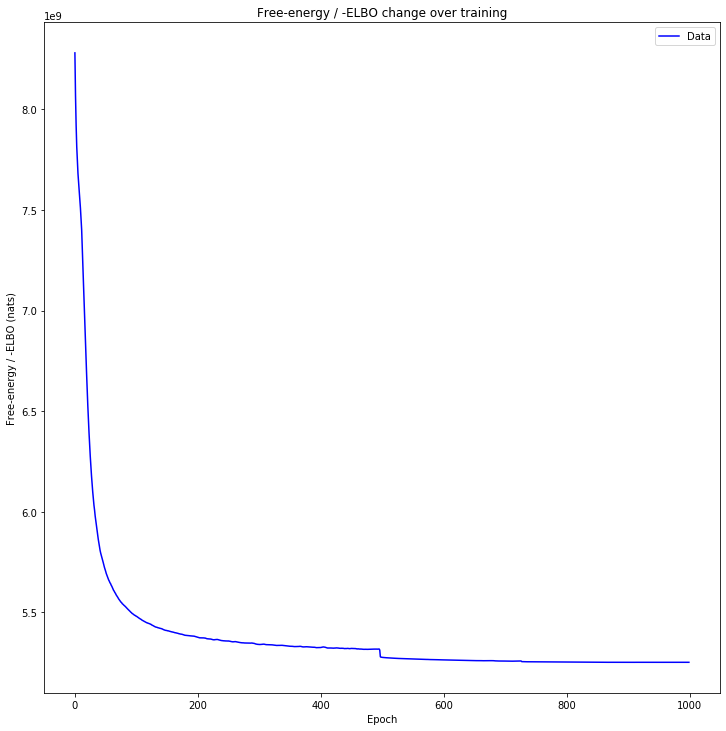

In [11]:
utils.plot_losses(losses)

In [12]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=50, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=20,
                    blocks_filter=haxby_db.inference_filter(training=False))

10/05/2020 21:04:30 [Epoch 1] (693ms) Posterior free-energy 1.24600960e+09 = KL from prior 9.41963359e+04 - log-likelihood -1.24591526e+09
10/05/2020 21:04:30 Saving checkpoint...
10/05/2020 21:04:31 [Epoch 2] (699ms) Posterior free-energy 1.22006771e+09 = KL from prior 9.53966797e+04 - log-likelihood -1.21997235e+09
10/05/2020 21:04:32 [Epoch 3] (698ms) Posterior free-energy 1.18759885e+09 = KL from prior 8.80938984e+04 - log-likelihood -1.18751091e+09
10/05/2020 21:04:32 [Epoch 4] (698ms) Posterior free-energy 1.17688883e+09 = KL from prior 8.78714844e+04 - log-likelihood -1.17680102e+09
10/05/2020 21:04:33 [Epoch 5] (696ms) Posterior free-energy 1.15780531e+09 = KL from prior 8.50268984e+04 - log-likelihood -1.15772032e+09
10/05/2020 21:04:34 [Epoch 6] (697ms) Posterior free-energy 1.12896013e+09 = KL from prior 8.35961094e+04 - log-likelihood -1.12887667e+09
10/05/2020 21:04:34 [Epoch 7] (694ms) Posterior free-energy 1.10836659e+09 = KL from prior 8.23490156e+04 - log-likelihood -1

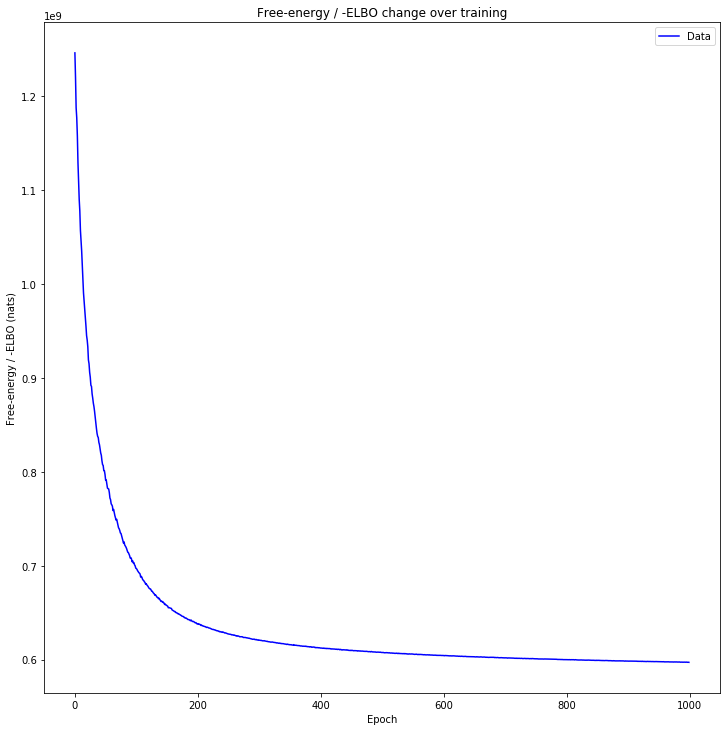

In [13]:
utils.plot_losses(losses)

In [14]:
def task_labeler(task):
    return task

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

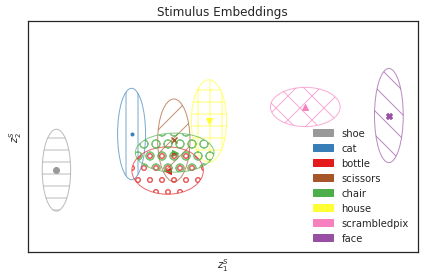

In [15]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='haxby_norest_task_embedding.pdf')

In [16]:
def subject_labeler(subject):
    return 'Subject %d' % subject

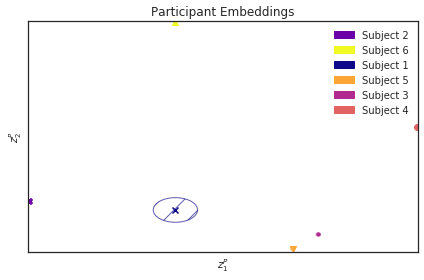

In [17]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [18]:
def block_task_labeler(b):
    task = b.task
    return task

10/05/2020 21:16:07 Plotting factors for Participant 4, run 8


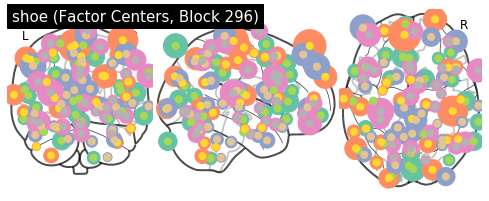

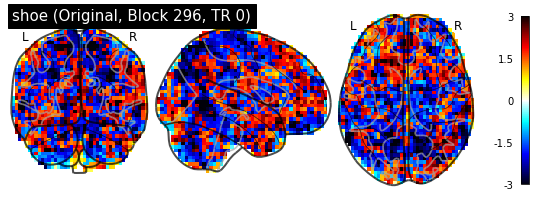

10/05/2020 21:16:10 Reconstruction Error (Frobenius Norm): 1.31949585e+02 out of 6.10891174e+02


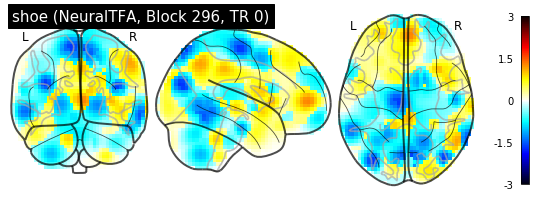

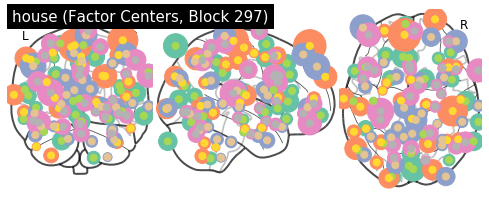

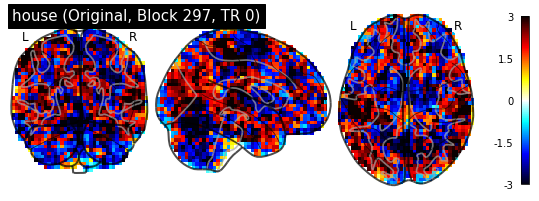

10/05/2020 21:16:13 Reconstruction Error (Frobenius Norm): 1.32028671e+02 out of 5.46255310e+02


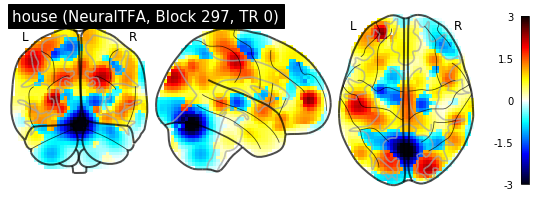

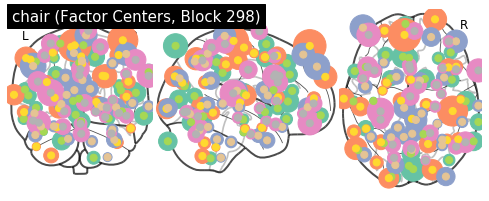

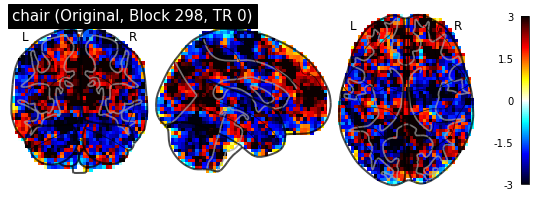

10/05/2020 21:16:16 Reconstruction Error (Frobenius Norm): 1.39221741e+02 out of 5.23738953e+02


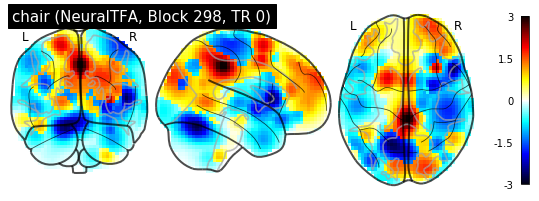

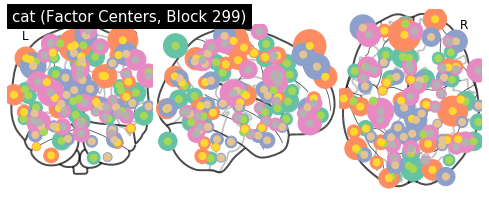

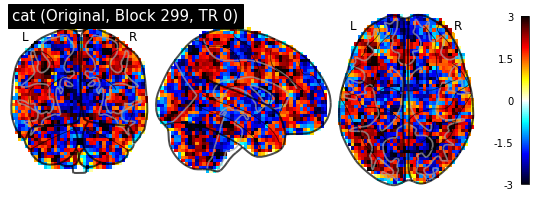

10/05/2020 21:16:18 Reconstruction Error (Frobenius Norm): 1.00285278e+02 out of 5.12569519e+02


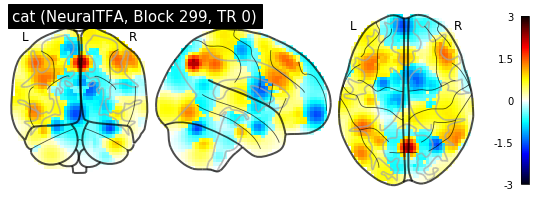

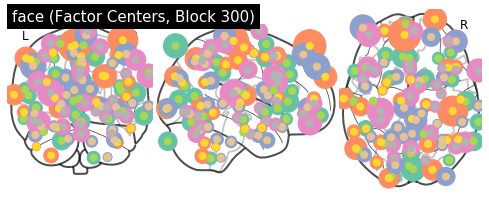

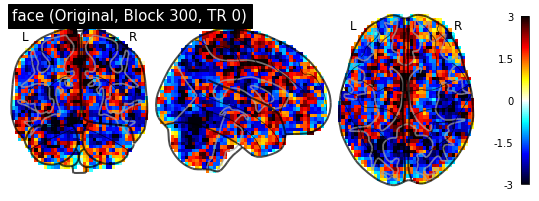

10/05/2020 21:16:21 Reconstruction Error (Frobenius Norm): 1.13824905e+02 out of 4.86299744e+02


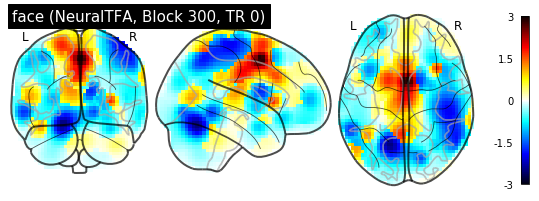

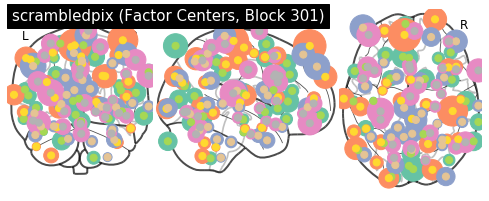

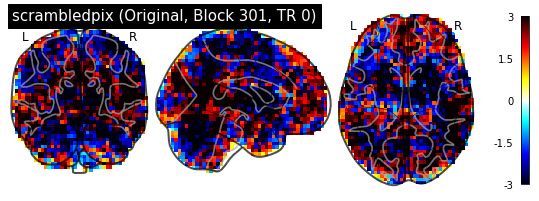

10/05/2020 21:16:24 Reconstruction Error (Frobenius Norm): 1.37182190e+02 out of 5.63339355e+02


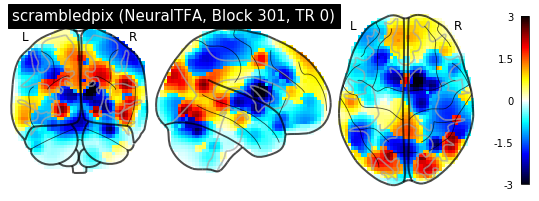

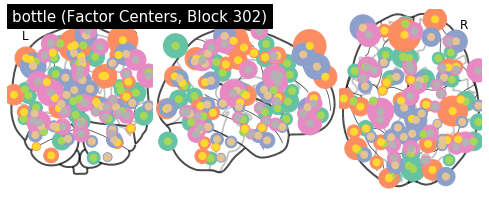

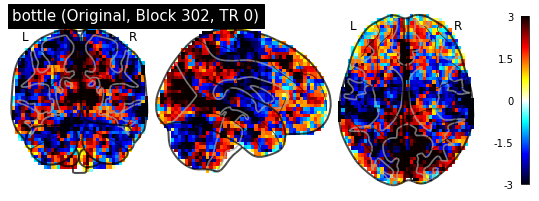

10/05/2020 21:16:27 Reconstruction Error (Frobenius Norm): 1.29472549e+02 out of 5.56774414e+02


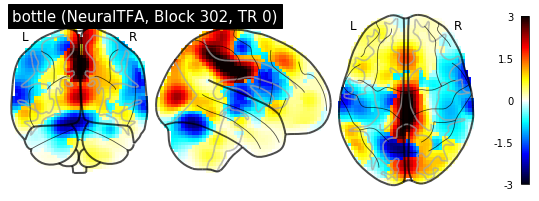

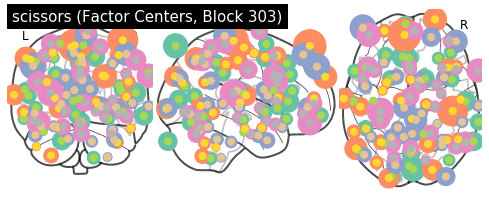

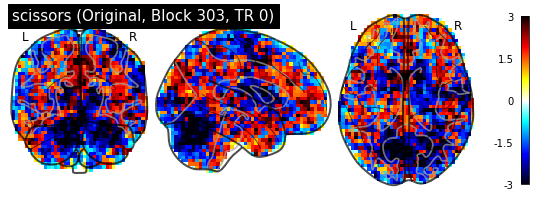

10/05/2020 21:16:30 Reconstruction Error (Frobenius Norm): 1.33874817e+02 out of 5.65762817e+02


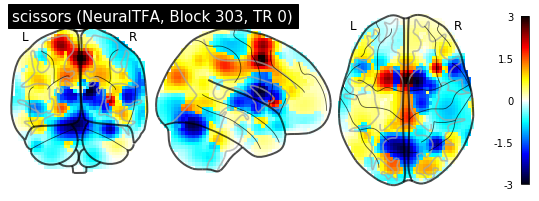

In [19]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

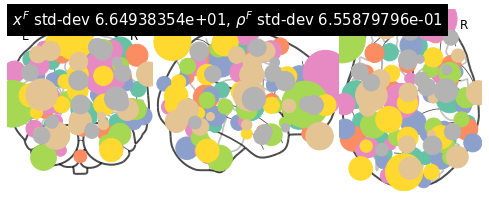

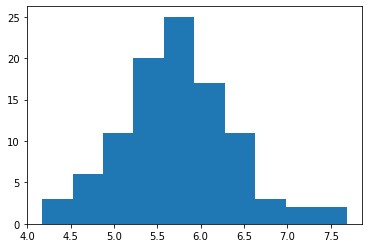

(<nilearn.plotting.displays.OrthoProjector at 0x7f9a49c2ee90>,
 tensor([[ -31.2737,  -47.2902,  -20.6648],
         [  41.8456,  -15.1641,   57.7172],
         [  39.3799,  -58.0516,  -17.7626],
         [ -29.7129,  -58.3162,   46.6015],
         [ -21.3814,   34.0748,   28.4097],
         [   4.3077,   40.8523,  -10.6117],
         [   2.0839,  -77.8577,   -3.6323],
         [  16.5868,  -77.1108,   33.8818],
         [ -51.5489,  -38.2182,   48.5821],
         [  60.9429,  -40.3179,   17.1681],
         [ -56.9321,  -10.5038,   -0.8500],
         [  24.2326,  -74.1398,  -16.7470],
         [ -28.4920,  -72.6712,  -42.9688],
         [  26.9849,   52.5517,  -28.7968],
         [ -18.9825,   -5.2295,   53.8528],
         [  -2.6520,   21.3609,   62.9677],
         [  32.0188,  -76.7651,   30.7702],
         [  43.4310,   20.1399,   29.6444],
         [   0.1734,  -55.5713,  -53.4296],
         [ -60.0840,  -56.8324,    9.3703],
         [  43.0872,    3.5623,  -27.2215],
         [ -3

In [20]:
dtfa.visualize_factor_embedding()

In [21]:
dtfa.average_reconstruction_error(weighted=False,
                                  blocks_filter=haxby_db.inference_filter(training=True))

10/05/2020 21:16:40 Average reconstruction error (MSE): 5.22120960e+02 +/- 4.25837005e+01
10/05/2020 21:16:40 Average data norm (Euclidean): 6.02923673e+02 +/- 6.28869033e+01
10/05/2020 21:16:40 Percent average reconstruction error: 86.878135 +/- 4.14363876e+00


(array([557.33453369, 532.56207275, 497.74002075, 506.12490845,
        523.41699219, 507.07061768, 510.51556396, 485.50405884,
        556.43707275, 526.15100098, 499.72174072, 448.71276855,
        469.05459595, 488.69204712, 545.59942627, 539.65075684,
        499.73550415, 495.54016113, 468.23025513, 500.16372681,
        477.36480713, 533.57885742, 501.22451782, 509.67767334,
        614.0680542 , 545.96459961, 506.34786987, 531.16906738,
        477.30218506, 511.70928955, 513.80377197, 476.20074463,
        583.4151001 , 522.95196533, 465.98550415, 492.52462769,
        529.10949707, 490.31008911, 504.86657715, 539.22558594,
        592.80627441, 498.86395264, 496.09213257, 519.02209473,
        525.39532471, 507.41921997, 542.97161865, 490.45175171,
        522.21923828, 533.69055176, 483.76013184, 455.27331543,
        506.21255493, 551.76452637, 517.61846924, 548.14691162,
        454.08306885, 448.36700439, 466.84606934, 447.83963013,
        464.36065674, 464.72531128, 431.

In [22]:
dtfa.free_energy(batch_size=50, use_cuda=True, blocks_batch_size=10, num_particles=1, sample_size=100,
                 blocks_filter=haxby_db.inference_filter(training=False))

[[597230784.0, -597086016.0, 144841.125],
 [597367168.0, -596939520.0, 145377.609375]]